<a href="https://colab.research.google.com/github/Shruti-Rani/YBI-Datascience/blob/main/Big_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Big sales prediction using Random Forest Regression**

**Objective**: you have given a 12 variable data set find the item_outlet_sales using 11 varibales


**Data Source**: YBI Foundation dataset

import library

In [1]:
import pandas as pd
import numpy as np

import data

In [3]:
df=pd.read_csv(r"/content/sample_data/Big Sales Data.csv",sep=",")

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

describe data

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [8]:
df['Item_Outlet_Sales'].value_counts()

958.752000     17
1342.252800    16
703.084800     15
1845.597600    15
1278.336000    14
               ..
2979.927510     1
4149.931400     1
4113.790835     1
2602.218784     1
3644.354765     1
Name: Item_Outlet_Sales, Length: 9144, dtype: int64

In [9]:
missing=df[df.isnull().any(axis=1)]

In [10]:
missing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
269,FDH48,NaN,Low Fat,0.105893,Baking Goods,86.2540,OUT019,1985,Small,Tier 1,Grocery Store,519.324000
272,FDS24,NaN,Regular,0.108947,Baking Goods,86.5514,OUT019,1985,Small,Tier 1,Grocery Store,794.435600
279,FDS24,NaN,Regular,0.061923,Baking Goods,87.5514,OUT027,1985,Medium,Tier 3,Supermarket Type3,1413.871780
280,FDC60,NaN,Regular,0.113918,Baking Goods,87.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,772.058409
287,FDL36,NaN,Low Fat,0.075707,Baking Goods,88.1830,OUT027,1985,Medium,Tier 3,Supermarket Type3,1438.128000
...,...,...,...,...,...,...,...,...,...,...,...,...
14176,FDF11,NaN,Regular,0.000000,Starchy Foods,238.3538,OUT027,1985,Medium,Tier 3,Supermarket Type3,11917.690000
14188,FDD11,NaN,Low Fat,0.053606,Starchy Foods,252.4040,OUT019,1985,Small,Tier 1,Grocery Store,4708.507347
14192,FDD11,NaN,Low Fat,0.030468,Starchy Foods,254.7040,OUT027,1985,Medium,Tier 3,Supermarket Type3,3036.048000
14197,FDG47,NaN,Low Fat,0.121894,Starchy Foods,261.3252,OUT019,1985,Small,Tier 1,Grocery Store,2143.879527


In [24]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [26]:
df.groupby('Item_Outlet_Sales').mean()

<ipython-input-26-d41f9af5837f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Item_Outlet_Sales').mean()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Outlet_Sales,,,,
33.29000,9.3025,0.032205,33.1400,1998.0
33.95580,12.5000,0.134328,35.0558,1985.0
34.62160,12.5000,0.073077,34.3216,1985.0
35.28740,7.1550,0.281510,33.8874,1998.0
36.61900,13.9250,0.024006,34.9190,1991.5
...,...,...,...,...
23729.68356,12.5000,0.010957,259.9962,1985.0
25175.12837,12.5000,0.009964,250.8408,1985.0
27377.85962,12.5000,0.007245,198.3426,1985.0


data visualization

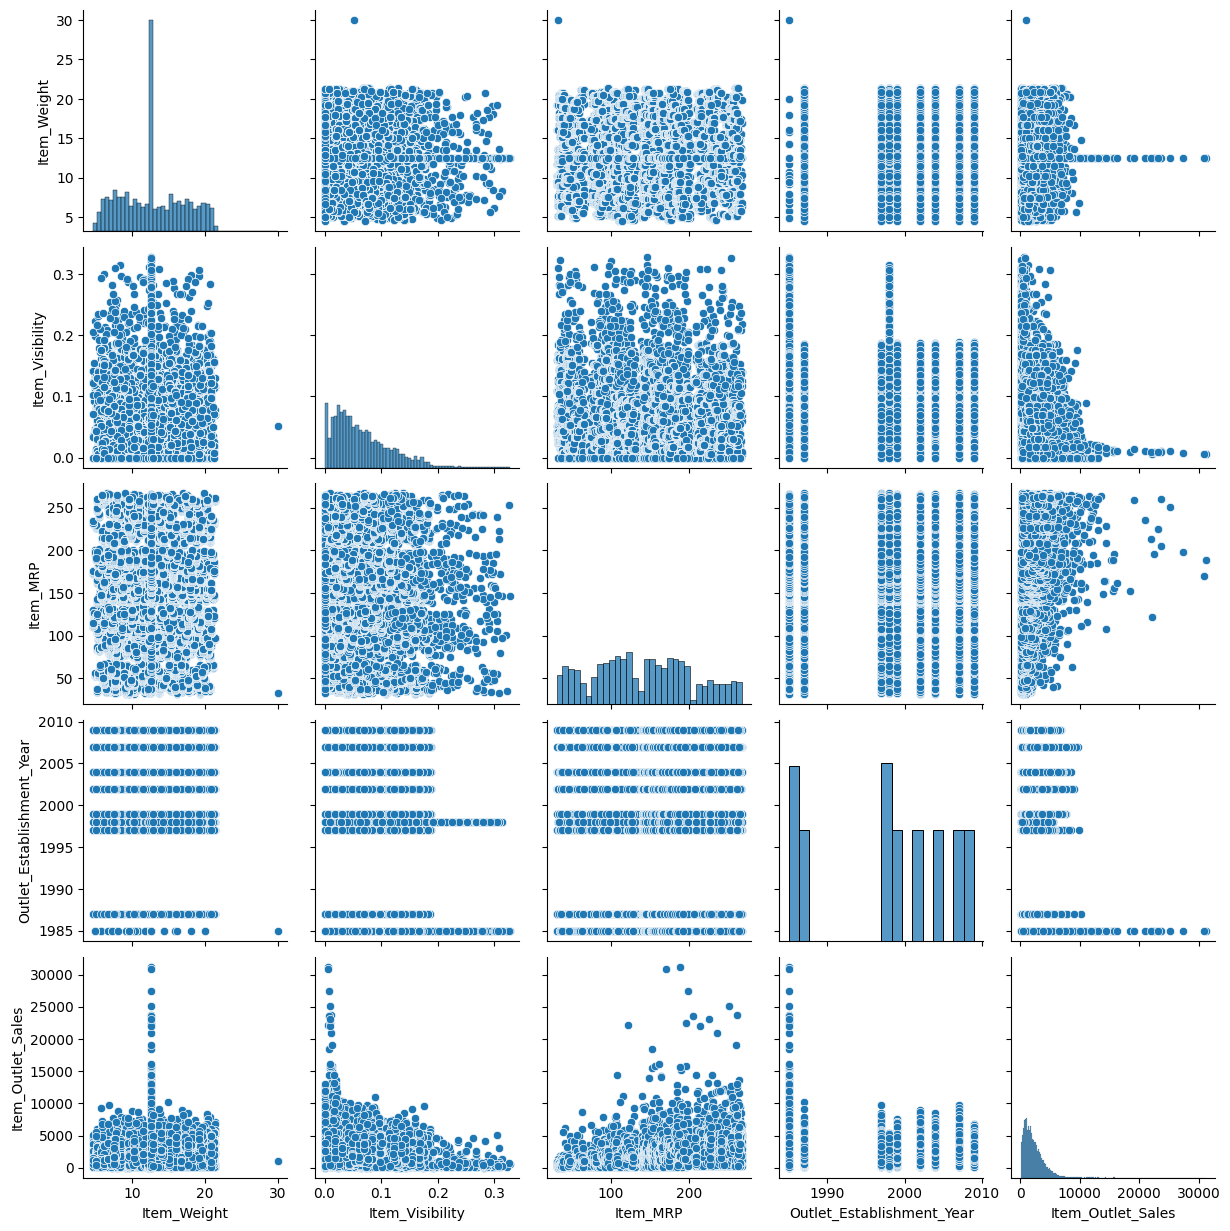

In [28]:
import seaborn as sns
sns.pairplot(df)

In [29]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [31]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [32]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [33]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [35]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [36]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [80]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}},inplace=True)

In [81]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [82]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [41]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT035':2,'OUT046':3,'OUT049':4,'OUT045':5,'OUT018':6,'OUT017':7,'OUT010':8,'OUT019':9}},inplace=True)

In [42]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [43]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [45]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [46]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [48]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [49]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [51]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [83]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [85]:
df.shape

(14204, 12)

define target variable(y) and feature variable(x)

In [86]:
y=df['Item_Outlet_Sales']
y.shape

(14204,)

In [60]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [87]:
x=df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
x.shape

(14204, 10)

In [88]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.3,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.3,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.3,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.3,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.8,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.8,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.8,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.8,0,0.069561,0,263.0252,1,1987,2,2,1
14202,12.5,0,0.069282,0,263.5252,0,1985,1,2,3


Data Processing


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()

In [89]:
x_std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [91]:
x_std=sc.fit_transform(x_std)

In [92]:
x_std

array([[-0.10359515,  0.88413635, -1.73178716,  0.13968068],
       [-0.10359515,  0.89300616, -1.72373366,  1.09531886],
       [-0.10359515,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.01416505,  0.07011952,  1.96538148, -1.29377659],
       [-0.05649107,  0.06469366,  1.97343499, -1.53268614],
       [ 0.01416505,  0.07334891,  1.97504569,  0.13968068]])

In [93]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(x_std,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

<ipython-input-93-5b60daa1b957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(x_std,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])


In [94]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.103595,0,0.884136,0,-1.731787,4,0.139681,1,0,1
1,-0.103595,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.103595,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.103595,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.692396,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.014165,0,0.070990,0,1.947664,2,0.736955,0,1,1
14200,0.014165,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.014165,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,-0.056491,0,0.064694,0,1.973435,0,-1.532686,1,2,3


train test split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11363, 10), (2841, 10), (11363,), (2841,))

modeling

In [98]:
from sklearn.ensemble import RandomForestRegressor

model evaluation

In [99]:
rfr=RandomForestRegressor(random_state=2529)

In [100]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

prediction

In [101]:
y_pred=rfr.predict(x_test)

In [102]:
y_pred.shape

(2841,)

In [103]:
y_pred

array([1441.99540951,  665.6716038 , 1931.21577642, ..., 3131.13369263,
        586.83628234, 1020.5106742 ])

Accuracy

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [105]:
mean_squared_error(y_test,y_pred)

1485443.249799366

In [106]:
mean_absolute_error(y_test,y_pred)

806.2001169125739

In [107]:
r2_score(y_test,y_pred)

0.5522478079488713

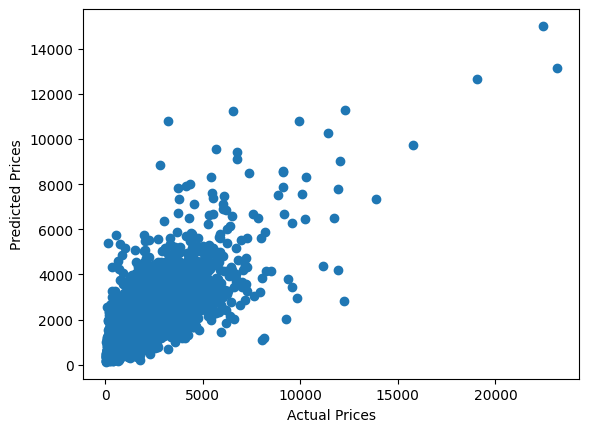

In [108]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

explanation

Following are the works done in the above written program:


1.   We have imported the data set
2.   checked the number of columns and there type

1.   find if there is any null value

1.   replaced the null value with the mean value
2.   convert the object data type into int data type using the replace function

1.   train the random forest regressor model
2.   fit the data set into model to predict the sales price





